In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('job market and employment1.csv')
print(df.head(10))


              Name     Age  Gender Highest Education Level Current Status  \
0     Dhanush Kala     NaN       F                     NaN     Unemployed   
1       Tejas Mand      30    Male                 Diploma      Homemaker   
2   Vritika Khosla     NaN     NaN             High School        Jobless   
3      Farhan Tata  Thirty       M              Bachelor's      Homemaker   
4    Pari Sachdeva      59  Female             High School        Student   
5  Mohanlal Butala     NaN    Male                Master's     Unemployed   
6      Oorja Baral  Thirty   Other                 Diploma        Student   
7      Jivika Gera      55       M                Master's     Unemployed   
8     Elakshi Kara     NaN     NaN                     PhD     Unemployed   
9    Nirvaan Sarma     NaN       F             High School      Homemaker   

  Current Industry/Domain Current Job Position Current Job Satisfaction Level  \
0               Education              Teacher                         

In [18]:
print(df.isnull().sum())
df = df.dropna()  

Name                                             0
Age                                           3287
Gender                                        1711
Highest Education Level                       1622
Current Status                                1666
Current Industry/Domain                       1224
Current Job Position                          1388
Current Job Satisfaction Level                1111
Years of Experience                           3411
Current Salary                                3356
Ever Changed Occupation?                      1970
Reason for Change                             1745
Previous Industry/Domain                      8220
Previous Job Position                         8269
Previous Salary                               9005
Interested in Changing Jobs in the Future?    3365
If Yes, Preferred Industry/Domain             7087
Employment Gap Duration                       3375
Reason for Gap                                2002
dtype: int64


In [19]:
num_cols = df.select_dtypes(include='number').columns
print(df[num_cols].describe().T)  

                 count     mean           std     min      25%      50%  \
Previous Salary   12.0  46265.5  30489.698766  5409.0  20960.0  46844.5   

                     75%      max  
Previous Salary  67304.5  90506.0  


In [21]:
avg_salary = df.groupby('Current Industry/Domain')['Current Salary'].mean()
highest = avg_salary.idxmax()
lowest  = avg_salary.idxmin()
print(f'Highest avg salary: {highest}')
print(f'Lowest avg salary : {lowest}')

TypeError: agg function failed [how->mean,dtype->object]

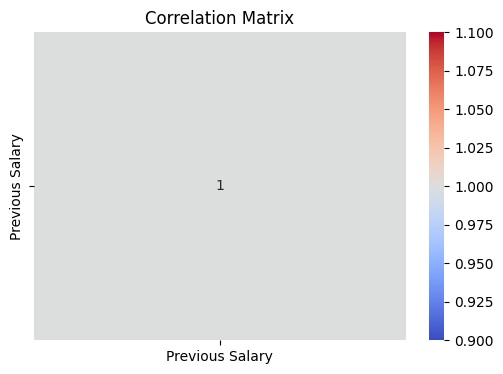

In [12]:
corr = df[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
sns.countplot(x='left', data=df)
plt.title('Employees who Left vs Stayed')
plt.xlabel('Left (1 = yes, 0 = no)')
plt.show()

ValueError: Could not interpret value `left` for `x`. An entry with this name does not appear in `data`.

In [ ]:
attrition = df.groupby('department')['left'].mean().sort_values(ascending=False)
print('Attrition rate per department:\n', attrition)